# Installing and Importing libraries

In [35]:
!pip install easyocr
!pip install imutils

In [36]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

 # Reading image and Grayscaling 

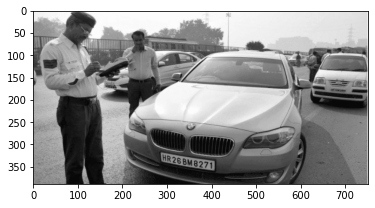

In [37]:
img = cv2.imread('image3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

#  Edge detection using canny algorithm 

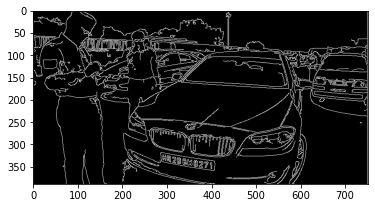

In [38]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

 #  Finding Contours

In [39]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [40]:
# print number plate coordinates
location

array([[[286, 319]],

       [[291, 339]],

       [[407, 357]],

       [[407, 337]]], dtype=int32)

#  Applying masking 

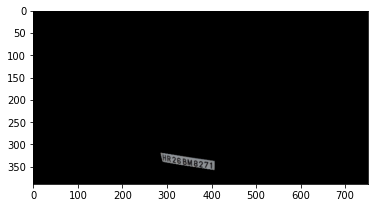

In [41]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

# Cropping number plate

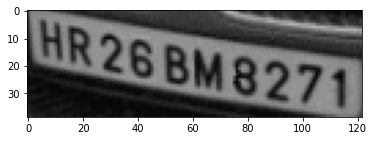

In [42]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2 +1, y1:y2 +1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Reading text using easyOCR 

In [43]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1.0220279500417875, -2.8361189448788164],
   [53.91042750043599, 7.272393124891001],
   [47.97797204995821, 31.836118944878816],
   [-3.9104275004359956, 21.727606875109]],
  'HR26/',
  0.3492586264874567),
 ([[47.105175020592156, 5.136560065894911],
   [124.96421935934924, 17.538043736205314],
   [119.89482497940784, 42.86343993410509],
   [42.035780640650756, 30.461956263794686]],
  'BM8221',
  0.21803496535049482)]

# Printing result on image

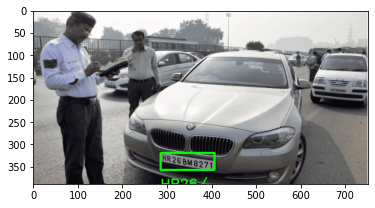

In [44]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))